In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_pickle('fits/cluster_results_noise.pkl')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Rename method kmeans to "Least squares K-means (sign-flipped eigenvectors)"
df['method'] = df['method'].replace('kmeans', 'Least squares K-means\n(sign-flipped eigenvectors)')
df['method'] = df['method'].replace('diametrical'+ 'Diametrical clustering')
df['method'] = df['method'].replace('diametrical_complex', 'Complex diametrical clustering')
df['method'] = df['method'].replace('grassmann', 'Grassmann clustering')
df['method'] = df['method'].replace('weighted_grassmann', 'Weighted Grassmann clustering')
df['method'] = df['method'].replace('Watson', 'Watson mixture')
df['method'] = df['method'].replace('Complex_Watson', 'Complex Watson mixture')
df['method'] = df['method'].replace('ACG_fullrank', 'ACG mixture')
df['method'] = df['method'].replace('Complex_ACG_fullrank', 'Complex ACG mixture')
df['method'] = df['method'].replace('MACG_fullrank', 'MACG mixture')
df['method'] = df['method'].replace('SingularWishart_fullrank', 'Singular Wishart mixture')

In [16]:
import matplotlib.text as mtext
class LegendTitle(object):
    def __init__(self, text_props=None):
        self.text_props = text_props or {}
        super(LegendTitle, self).__init__()

    def legend_artist(self, legend, orig_handle, fontsize, handlebox):
        x0, y0 = handlebox.xdescent, handlebox.ydescent
        title = mtext.Text(x0, y0, orig_handle,  **self.text_props)
        handlebox.add_artist(title)
        return title

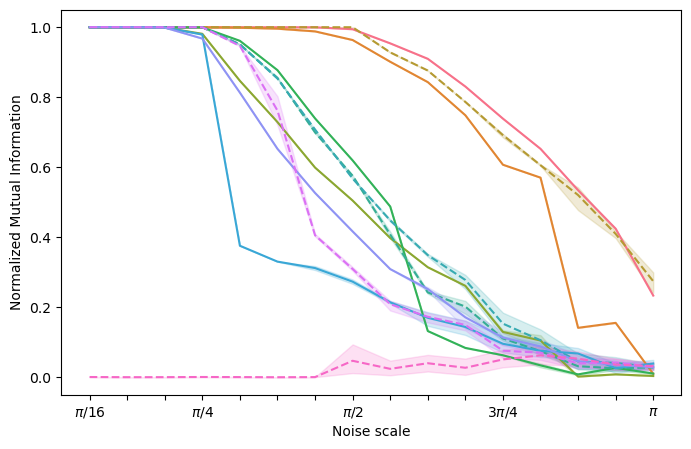

In [64]:
# make a lineplot for each of the unique methods in the column "method". the y-axis value should be the column "nmi". the x-axis should correspond to the column "noise", only the x-axis labels should actually correspond to [pi/4,pi/2,3pi/4,...,2pi]
# g1 = ['Least squares K-means\n(sign-flipped eigenvectors)','Diametrical clustering','Complex diametrical clustering','Grassmann clustering','Weighted Grassmann clustering']
# g2 = ['Watson mixture','Complex Watson mixture','ACG mixture','Complex ACG mixture','MACG mixture','Singular Wishart mixture']
g = ['Complex Watson mixture','Complex ACG mixture','Complex diametrical clustering',
     'MACG mixture','Singular Wishart mixture','Grassmann clustering','Weighted Grassmann clustering',
     'Watson mixture','ACG mixture','Diametrical clustering','Least squares K-means\n(sign-flipped eigenvectors)']


palette = sns.color_palette("husl", n_colors=11, desat=1)
plt.figure(figsize=(8,5))
ax = plt.gca()
# ax = sns.lineplot(data=df[df['method'].isin(g1)], x='noise', y='nmi', hue='method',ax=ax,palette=palette[:5])
# ax = sns.lineplot(data=df[df['method'].isin(g2)], x='noise', y='nmi', hue='method',ax=ax,palette=palette[5:])
ax = sns.lineplot(data=df[df['method'].isin(g)], x='noise', y='nmi', hue='method',ax=ax,palette=palette,hue_order=g,legend=False)
ax.lines[2].set_linestyle("--")
ax.lines[5].set_linestyle("--")
ax.lines[6].set_linestyle("--")
ax.lines[9].set_linestyle("--")
ax.lines[10].set_linestyle("--")
# plt.xticks(range(16), labels=[r'$\pi/16$',r'$\pi/8$',r'$3\pi/16$',r'$\pi/4$',r'$5\pi/16$',r'$3\pi/8$',r'$7\pi/16$',r'$\pi/2$',
#                               r'$9\pi/16$',r'$5\pi/8$',r'$11\pi/16$',r'$3\pi/4$',r'$13\pi/16$',r'$7\pi/8$',r'$15\pi/16$',r'$\pi$'])#
plt.xticks(range(16), labels=[r'$\pi/16$','','',r'$\pi/4$','','','',r'$\pi/2$',
                              '','','',r'$3\pi/4$','','','',r'$\pi$'])#
# plt.xlim(0,3)
plt.ylabel('Normalized Mutual Information')
plt.xlabel('Noise scale')
# plt.title('Clustering performance on 3-dimensional synthetic data', fontsize=16)
#remove title from legend
handles, labels = ax.get_legend_handles_labels()
#add subtitles to handles and labels

# ax.legend(handles=handles2, labels=labels2,
#            handler_map={str: LegendTitle({'fontsize': 16})})
# leg = ax.legend(bbox_to_anchor=(1, 0.80))
# leg_lines = leg.get_lines()
# leg_lines[2].set_linestyle("--")
# leg_lines[5].set_linestyle("--")
# leg_lines[6].set_linestyle("--")
# leg_lines[9].set_linestyle("--")
# leg_lines[10].set_linestyle("--")
plt.savefig('figs/cluster_results_noise.png', bbox_inches='tight', dpi=300)

['', '', '', '', '']

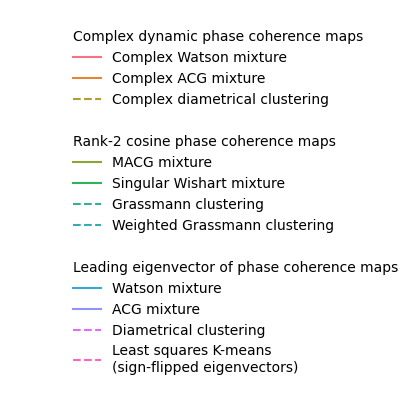

In [78]:
fig,axs = plt.subplots(1,1,figsize=(5,5))
hands = [plt.plot([], color=palette[0],linestyle='--')[0]]

handles2 = ['Complex dynamic phase coherence maps',plt.plot([], color=palette[0])[0],plt.plot([], color=palette[1])[0],plt.plot([], color=palette[2], linestyle='--')[0],
              '','Rank-2 cosine phase coherence maps',plt.plot([], color=palette[3])[0],plt.plot([], color=palette[4])[0],plt.plot([], color=palette[5], linestyle='--')[0],plt.plot([], color=palette[6], linestyle='--')[0],
                '','Leading eigenvector of cosine phase coherence maps',plt.plot([], color=palette[7])[0],plt.plot([], color=palette[8])[0],plt.plot([], color=palette[9], linestyle='--')[0],plt.plot([], color=palette[10], linestyle='--')[0]]
# labels2 = ['',g[:3],'',g[3:7],'',g[7:]]
labels2 = ['',g[0],g[1],g[2],'','',g[3],g[4],g[5],g[6],'','',g[7],g[8],g[9],g[10]]
axs.legend(handles2, labels2, handler_map={str: LegendTitle({'fontsize': 10})},loc='center',bbox_to_anchor=(0.5, 0.5),frameon=False)
axs.axis('off');
plt.savefig('figs/cluster_results_noise_legend.png', bbox_inches='tight', dpi=300)